<a href="https://colab.research.google.com/github/mohammedawney84/Deep-Learning-with-PyTorch/blob/master/CNN%20filter%20visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline
#from google.colab import files
#uploaded_file = files.upload()


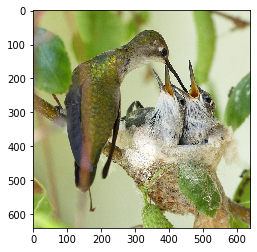

In [8]:
image = cv2.imread('/content/A-Gentle-Introduction-to-Transfer-Learning-with-Deep-Learning.jpg')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

<class 'numpy.ndarray'>


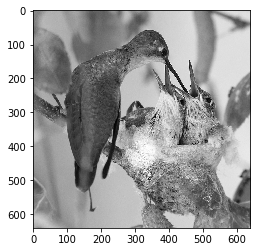

In [30]:
gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
gray = gray.astype("double")/255
print(type(gray))
plt.imshow(gray, cmap='gray')
plt.show()

In [12]:
#Define some filters
#We are creating 3 filters intialized with zeros
l1_filter = np.zeros((3, 3, 3))
print(l1_filter)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [14]:
#giving values to filters
#horizontl edge detection
l1_filter[0::] = [[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]]

#General Edge detection
l1_filter[1::] = [[0, -1, 0],
                  [-1, 4, -1],
                  [0, -1, 0]]

l1_filter[2::] = [[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]]
print(l1_filter[0])

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [0]:
# Define a convolutional layer in init function

class Net(nn.Module):
  def __init__(self, weight):
    super(Net, self).__init__()
    num_filters = 3
    self.conv = nn.Conv2d(1, num_filters, kernel_size=(3, 3), bias=False)
    # Setting Wights
    self.conv.weight = torch.nn.Parameter(weight)
    self.pool = nn.MaxPool2d(2)
  def forward(self, x):
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    pooled_x = self.pool(activated_x)
    #Return all layers
    return conv_x, activated_x, pooled_x

  

In [32]:
#Initiated the model and setting the weights to be those from our pre-defined filters
weight = torch.from_numpy(l1_filter).unsqueeze(1)
print(weight.shape)
print(type(weight))

torch.Size([3, 1, 3, 3])
<class 'torch.Tensor'>


In [33]:
model = Net(weight)
print(model)

Net(
  (conv): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [40]:
# Plotting the filters and visualize the convolution layers
def plot_filters(filters):
  n_filters = len(filters)
  fig = plt.figure(figsize=(12, 6))
  fig.supplots_adjust(left=0, reight=1.5, bottom=0.8, hspace=0.05, wspace=0.05)
  for i in range(n_filters):
    ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    #ax.set_title('Filter %s', %str(i+1))
  # Function to visuialize layers
  
def viz_layer(layer, n_filters=3):
  fig = plt.figure(figsize=(20, 20))
  for i in range(n_filters):
    axis = fig.add_subplot(1, n_filters, i+1)
      #Grab layer outputs
    axis.imshow(np.squeeze(layer[0, i].data.numpy()), cmap='gray')
      #axis.set_title('Output Filtered Image%s' % str(i+1))
#Convert the gray scal image to tensor
gray_im_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)
print(gray_im_tensor.shape)
print(type(gray_im_tensor))
conv_layer, activated_layer, pooled_layer = model(gray_im_tensor)


torch.Size([1, 1, 640, 639])
<class 'torch.Tensor'>


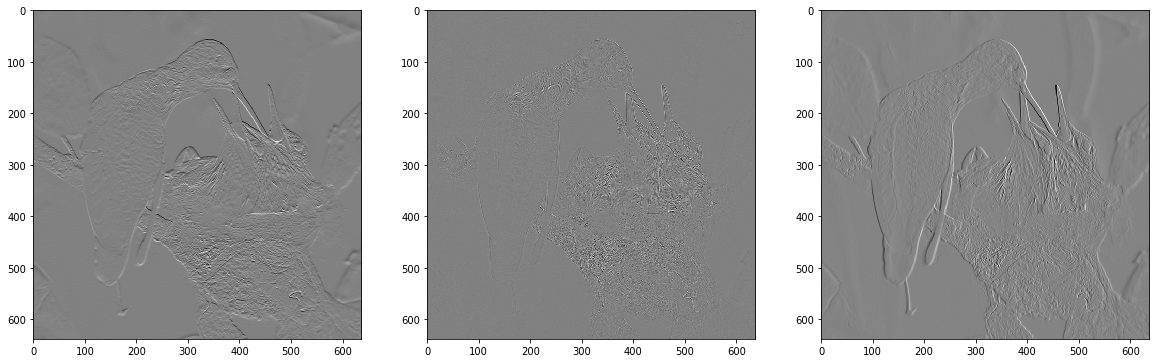

In [41]:
viz_layer(conv_layer)

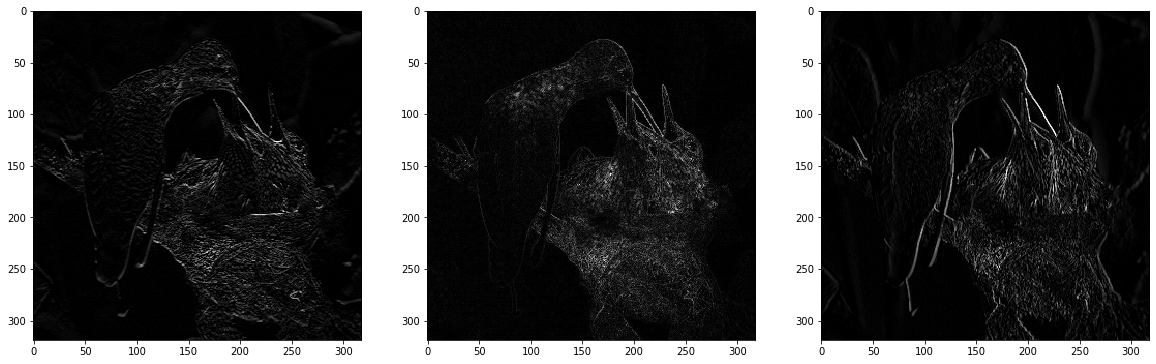

In [42]:
viz_layer(pooled_layer)

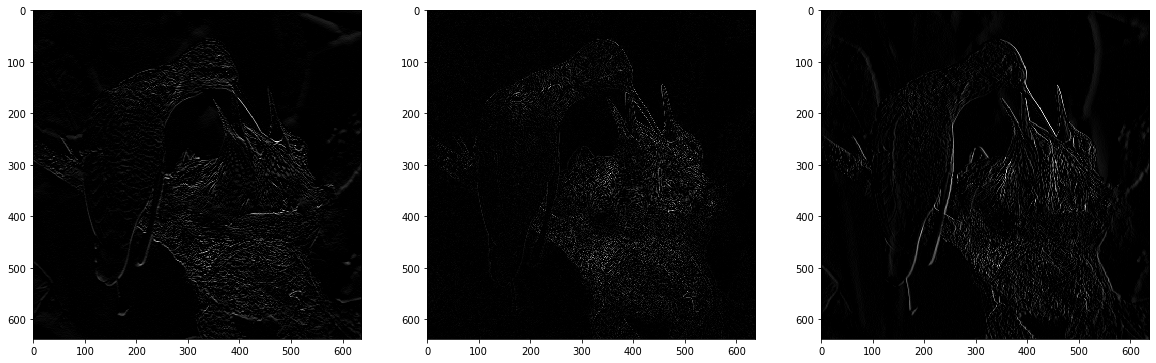

In [43]:
viz_layer(activated_layer)